In [50]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score, roc_curve

In [2]:
dfRaw = pd.read_csv('/Users/taddbackus/School/fall23/qtw/cs7/final_project(5).csv')
print(dfRaw.head())

         x0        x1         x2        x3        x4         x5         x6  \
0 -0.166563 -3.961588   4.621113  2.481908 -1.800135   0.804684   6.718751   
1 -0.149894 -0.585676  27.839856  4.152333  6.426802  -2.426943  40.477058   
2 -0.321707 -1.429819  12.251561  6.586874 -5.304647 -11.311090  17.812850   
3 -0.245594  5.076677 -24.149632  3.637307  6.505811   2.290224 -35.111751   
4 -0.273366  0.306326 -11.352593  1.676758  2.928441  -0.616824 -16.505817   

          x7        x8        x9  ...        x41       x42       x43  \
0 -14.789997 -1.040673 -4.204950  ...  -1.497117  5.414063 -2.325655   
1  -6.725709  0.896421  0.330165  ...  36.292790  4.490915  0.762561   
2  11.060572  5.325880 -2.632984  ...  -0.368491  9.088864 -0.689886   
3 -18.913592 -0.337041 -5.568076  ...  15.691546 -7.467775  2.940789   
4  27.532281  1.199715 -4.309105  ... -13.911297 -5.229937  1.783928   

        x44       x45        x46       x47       x48        x49  y  
0  1.674827 -0.264332  60.781

In [3]:
print(dfRaw.describe())

                  x0             x1             x2             x3  \
count  159974.000000  159975.000000  159962.000000  159963.000000   
mean       -0.001028       0.001358      -1.150145      -0.024637   
std         0.371137       6.340632      13.273480       8.065032   
min        -1.592635     -26.278302     -59.394048     -35.476594   
25%        -0.251641      -4.260973     -10.166536      -5.454438   
50%        -0.002047       0.004813      -1.340932      -0.031408   
75%         0.248532       4.284220       7.871676       5.445179   
max         1.600849      27.988178      63.545653      38.906025   

                  x4             x5             x6             x7  \
count  159974.000000  159963.000000  159974.000000  159973.000000   
mean       -0.000549       0.013582      -1.670670      -7.692795   
std         6.382293       7.670076      19.298665      30.542264   
min       -28.467536     -33.822988     -86.354483    -181.506976   
25%        -4.313118      -5.1481

In [4]:
print(dfRaw.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 160000 entries, 0 to 159999
Data columns (total 51 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   x0      159974 non-null  float64
 1   x1      159975 non-null  float64
 2   x2      159962 non-null  float64
 3   x3      159963 non-null  float64
 4   x4      159974 non-null  float64
 5   x5      159963 non-null  float64
 6   x6      159974 non-null  float64
 7   x7      159973 non-null  float64
 8   x8      159979 non-null  float64
 9   x9      159970 non-null  float64
 10  x10     159957 non-null  float64
 11  x11     159970 non-null  float64
 12  x12     159964 non-null  float64
 13  x13     159969 non-null  float64
 14  x14     159966 non-null  float64
 15  x15     159965 non-null  float64
 16  x16     159974 non-null  float64
 17  x17     159973 non-null  float64
 18  x18     159960 non-null  float64
 19  x19     159965 non-null  float64
 20  x20     159962 non-null  float64
 21  x21     15

In [14]:
df = dfRaw.copy()

In [17]:
columns_to_encode = ['x24','x29','x30']
for i in columns_to_encode:
    df[i] = df[i].fillna('unknown')

In [18]:
missingData = []
for i in df:
    if df[i].isnull().sum() > 0:
        print(i,':',df[i].isnull().sum(),'missing')
        print(i,':',df[i].isnull().sum() / len(df),'%')
        missingData.append(i)

x0 : 26 missing
x0 : 0.0001625 %
x1 : 25 missing
x1 : 0.00015625 %
x2 : 38 missing
x2 : 0.0002375 %
x3 : 37 missing
x3 : 0.00023125 %
x4 : 26 missing
x4 : 0.0001625 %
x5 : 37 missing
x5 : 0.00023125 %
x6 : 26 missing
x6 : 0.0001625 %
x7 : 27 missing
x7 : 0.00016875 %
x8 : 21 missing
x8 : 0.00013125 %
x9 : 30 missing
x9 : 0.0001875 %
x10 : 43 missing
x10 : 0.00026875 %
x11 : 30 missing
x11 : 0.0001875 %
x12 : 36 missing
x12 : 0.000225 %
x13 : 31 missing
x13 : 0.00019375 %
x14 : 34 missing
x14 : 0.0002125 %
x15 : 35 missing
x15 : 0.00021875 %
x16 : 26 missing
x16 : 0.0001625 %
x17 : 27 missing
x17 : 0.00016875 %
x18 : 40 missing
x18 : 0.00025 %
x19 : 35 missing
x19 : 0.00021875 %
x20 : 38 missing
x20 : 0.0002375 %
x21 : 29 missing
x21 : 0.00018125 %
x22 : 27 missing
x22 : 0.00016875 %
x23 : 47 missing
x23 : 0.00029375 %
x25 : 22 missing
x25 : 0.0001375 %
x26 : 36 missing
x26 : 0.000225 %
x27 : 30 missing
x27 : 0.0001875 %
x28 : 35 missing
x28 : 0.00021875 %
x31 : 39 missing
x31 : 0.00024

In [19]:
df['x37'] = df['x37'].str.replace('$','').astype(float)
df['x32'] = df['x32'].str.replace('%','').astype(float)

/var/folders/b6/xllr9jf92s55608_ychrqz700000gn/T/ipykernel_51131/2956702921.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df['x37'] = df['x37'].str.replace('$','').astype(float)


In [25]:
categorical_columns = df.select_dtypes(include = ['object']).columns

for col in categorical_columns:
    unique_values = df[col].unique()
    unique_count = len(unique_values)
    print(f"Unique values in {col} ({unique_count} unique values): \n{unique_values}\n\n")

In [23]:
for i in missingData:
    df[i].fillna(df[i].median(),inplace=True)
for i in df:
    if df[i].isnull().sum() > 0:
        print(i, ':', df[i].isnull().sum(), 'missing')

In [24]:
df = pd.get_dummies(df, columns=columns_to_encode, prefix=columns_to_encode)


In [27]:
X = df.drop(columns='y')
y = df['y']
print(df.shape)
print(X.shape)
print(y.shape)

(160000, 71)
(160000, 70)
(160000,)


In [28]:
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [29]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)


In [30]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(128000, 70)
(32000, 70)
(128000,)
(32000,)


In [31]:
rfModel = RandomForestClassifier(n_estimators=10)
rfModel.fit(X_train,y_train)

RandomForestClassifier(n_estimators=10)

In [46]:
yPred = rfModel.predict(X_test)
yProb = rfModel.predict_proba(X_test)[:,1]

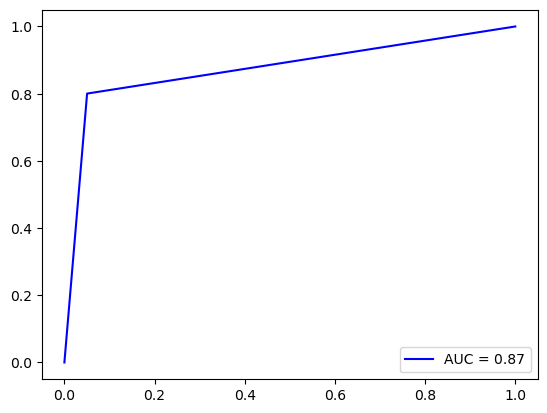

In [44]:
fpr, tpr, thresholds = roc_curve(y_test,yPred)
roc_auc = roc_auc_score(y_test,yPred)
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.show()

In [33]:
accuracy_score(y_test,yPred)

0.89

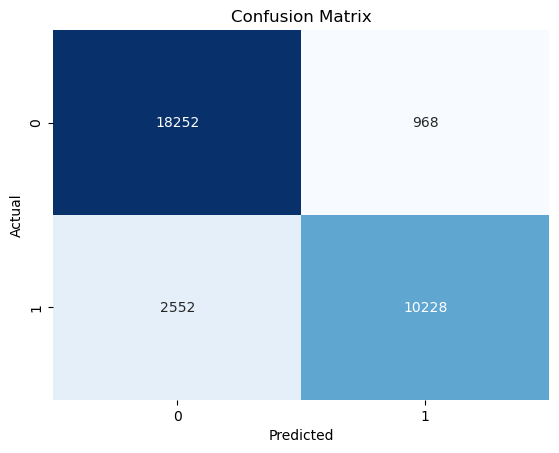

In [35]:
conf_matrix = confusion_matrix(y_test,yPred)

sns.heatmap(conf_matrix,
            annot=True,
            fmt = 'd',
            cmap = 'Blues',
            cbar = False,
            xticklabels = ['0','1',],
            yticklabels = ['0','1'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [40]:
conf_matrix[0][1]
conf_matrix[1][0]

cost = (conf_matrix[0][1] * 40 + conf_matrix[1][0] *100) * 5

In [41]:
print(cost)

1469600


In [47]:
print(yProb)

[0.2 0.4 0.3 ... 0.5 0.1 0.7]


In [48]:
def threshold_test(probabilities, th):
    return [1 if prob >= th else 0 for prob in probabilities]
def cost_score(confMatrix):
    return (confMatrix[0][1] * 40 + confMatrix[1][0] * 100) * 5

In [52]:
lowestTH = 1
lowestCost = 160000*100
thresholds = np.linspace(0,1,100)
for t in thresholds:
    conf_matrix = confusion_matrix(y_test, threshold_test(yProb,t))
    cost = cost_score(conf_matrix)
    if cost < lowestCost:
        lowestCost = cost
        lowestTH = t
    print('Threshold:',t)
    print('Total Money Lost:',cost)
    print('========================')
print('=========================')
print('=========================')
print('=========================')
print('Lowest:')
print('Threshold:',lowestTH)
print('Cost:',lowestCost)

Threshold: 0.0
Total Money Lost: 3844000
Threshold: 0.010101010101010102
Total Money Lost: 2807300
Threshold: 0.020202020202020204
Total Money Lost: 2807300
Threshold: 0.030303030303030304
Total Money Lost: 2807300
Threshold: 0.04040404040404041
Total Money Lost: 2807300
Threshold: 0.05050505050505051
Total Money Lost: 2807300
Threshold: 0.06060606060606061
Total Money Lost: 2807300
Threshold: 0.07070707070707072
Total Money Lost: 2807300
Threshold: 0.08080808080808081
Total Money Lost: 2807300
Threshold: 0.09090909090909091
Total Money Lost: 2807300
Threshold: 0.10101010101010102
Total Money Lost: 1915900
Threshold: 0.11111111111111112
Total Money Lost: 1915900
Threshold: 0.12121212121212122
Total Money Lost: 1915900
Threshold: 0.13131313131313133
Total Money Lost: 1915900
Threshold: 0.14141414141414144
Total Money Lost: 1915900
Threshold: 0.15151515151515152
Total Money Lost: 1915900
Threshold: 0.16161616161616163
Total Money Lost: 1915900
Threshold: 0.17171717171717174
Total Money L